In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sb

In [2]:
# Reading the file
data = pd.read_csv('People Charm case.csv')
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


# <U> EDA </U>


In [3]:
data.shape

(14999, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfactoryLevel        14999 non-null float64
lastEvaluation           14999 non-null float64
numberOfProjects         14999 non-null int64
avgMonthlyHours          14999 non-null int64
timeSpent.company        14999 non-null int64
workAccident             14999 non-null int64
left                     14999 non-null int64
promotionInLast5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Checking Data Types 

In [6]:
data.dtypes

satisfactoryLevel        float64
lastEvaluation           float64
numberOfProjects           int64
avgMonthlyHours            int64
timeSpent.company          int64
workAccident               int64
left                       int64
promotionInLast5years      int64
dept                      object
salary                    object
dtype: object

# Checking no. of unique entries in every columns 

In [7]:
# Checking no. of unique entries in each columns
for columns in data.columns:
    print(columns,': ',data[columns].nunique())
    print('---------------------------------')
    print(data[columns].unique())
    print('================================================================================')

satisfactoryLevel :  92
---------------------------------
[0.38 0.8  0.11 0.37 0.41 0.1  0.92 0.42 0.45 0.36 0.78 0.76 0.09 0.46
 0.4  0.89 0.82 0.84 0.87 0.57 0.43 0.13 0.39 0.74 0.79 0.44 0.9  0.71
 0.7  0.31 0.73 0.83 0.32 0.54 0.77 0.88 0.85 0.48 0.81 0.12 0.61 0.91
 0.86 0.56 0.75 0.47 0.28 0.55 0.59 0.53 0.66 0.72 0.34 0.64 0.23 0.15
 0.14 0.3  0.35 0.62 0.51 0.29 0.2  0.63 0.16 0.17 0.6  0.65 0.49 0.68
 0.67 0.26 0.99 0.5  1.   0.24 0.19 0.52 0.98 0.33 0.58 0.93 0.69 0.96
 0.97 0.27 0.22 0.95 0.94 0.18 0.21 0.25]
lastEvaluation :  65
---------------------------------
[0.53 0.86 0.88 0.52 0.5  0.77 0.85 0.54 0.81 0.56 0.47 0.99 0.89 0.83
 0.95 0.57 0.92 0.87 0.49 0.62 0.51 0.46 0.8  0.7  0.78 0.97 0.79 0.59
 0.45 1.   0.84 0.94 0.96 0.48 0.82 0.91 0.98 0.55 0.74 0.9  0.93 0.71
 0.6  0.65 0.72 0.67 0.75 0.58 0.73 0.63 0.68 0.61 0.76 0.66 0.69 0.37
 0.41 0.43 0.64 0.44 0.39 0.4  0.38 0.42 0.36]
numberOfProjects :  6
---------------------------------
[2 5 7 6 4 3]
avgMonthlyHours : 

#### Note:
As 'workAccident' ,'left' & 'promotionInLast5years' each has 2 unique value stating Yes and No in terms (or 0 & 1), therefor they are taken as category columns for analysis


In [8]:
numerical_columns = ['satisfactoryLevel', 'lastEvaluation','avgMonthlyHours']
categorical_columns = ['workAccident', 'left','numberOfProjects','promotionInLast5years', 'dept', 'salary','timeSpent.company']

# Checking Missing Values

In [9]:
data.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

# Univariate Analysis 

AxesSubplot(0.125,0.125;0.775x0.755)


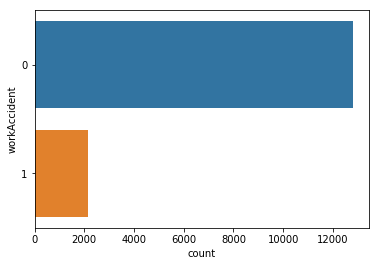

AxesSubplot(0.125,0.125;0.775x0.755)


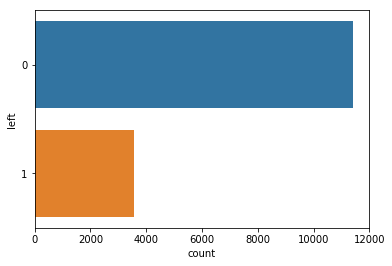

AxesSubplot(0.125,0.125;0.775x0.755)


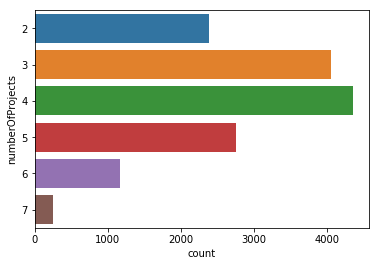

AxesSubplot(0.125,0.125;0.775x0.755)


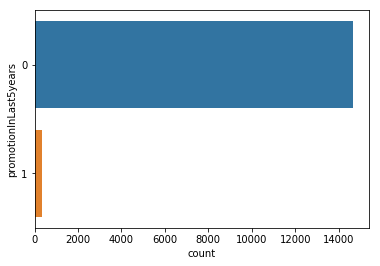

AxesSubplot(0.125,0.125;0.775x0.755)


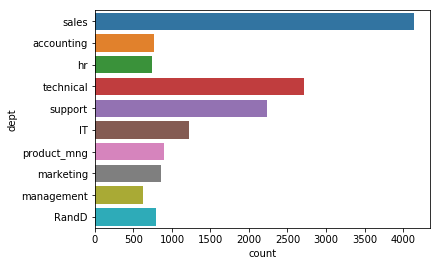

AxesSubplot(0.125,0.125;0.775x0.755)


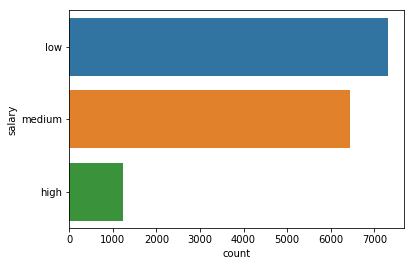

AxesSubplot(0.125,0.125;0.775x0.755)


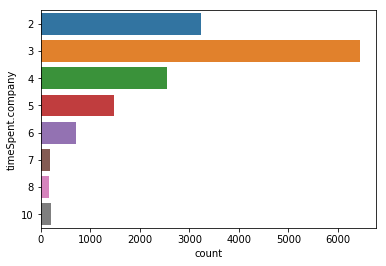

In [10]:
# Checking Categorical Columns
for i in categorical_columns:
    print(sb.countplot(y = data[i]))
    plt.show()

### Note:
1.) No. of work accidents in company is less which is good

2.) Target varianbe (left) is not well balanced which means data is imbalanced.

3.) No. of promotions in last 5 Years is very less.

4.) Sales has most no. of employees.

5.) Majority of persons are in low salary category

6.) Most employees leave company after working for 3 years.





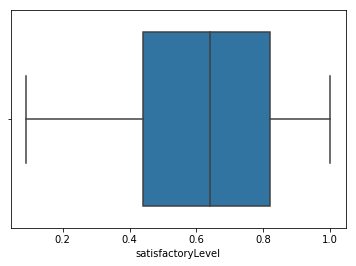

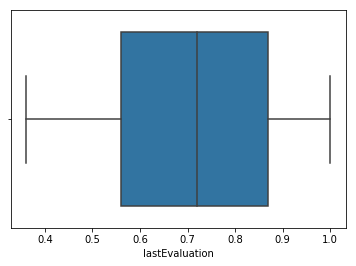

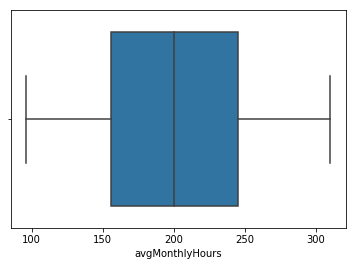

In [11]:
# Checking Outliers
for i in numerical_columns:
    sb.boxplot(data[i])
    plt.show()

### Note:
-- 'timeSpent.company' has outliers. We will not treat outliers as these outliers reflect reality( Every employee has his own choice to leave or stay in a company). 

-- Others attributes does not have any outliers.

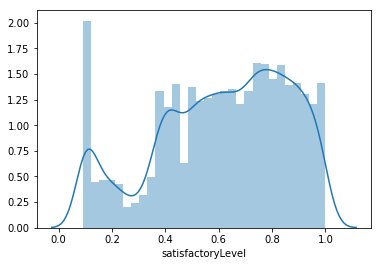

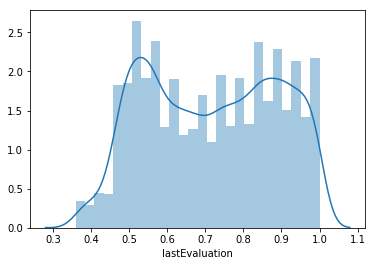

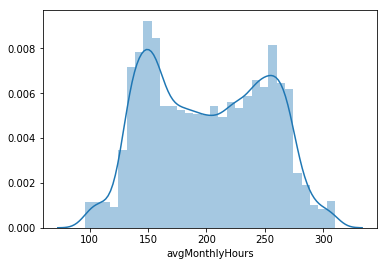

In [12]:
# Checking Distribution
for i in numerical_columns:
    sb.distplot(data[i])
    plt.show()

In [13]:
# Checking Skewness
data.skew()

satisfactoryLevel       -0.476360
lastEvaluation          -0.026622
numberOfProjects         0.337706
avgMonthlyHours          0.052842
timeSpent.company        1.853319
workAccident             2.021149
left                     1.230043
promotionInLast5years    6.636968
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

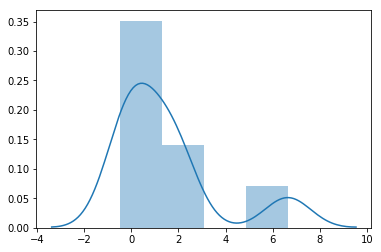

In [14]:
sb.distplot(data.skew())
plt.show

### Note:
From the above graph we can see that data is not balanced.

# Bivariate Analysis 

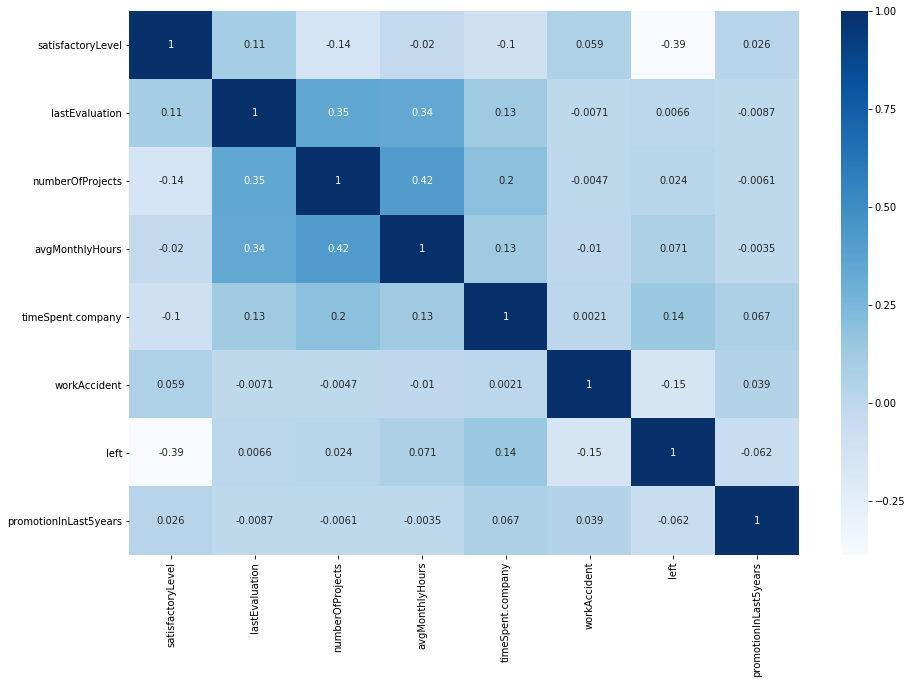

In [15]:
# checking the corelation
plt.figure(figsize=(15,10))
sb.heatmap(data.corr(),annot=True,cmap="Blues")

# Encoding 

In [16]:
data['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [17]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

### Applying Label Encoding for Salary Column 

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
LE = LabelEncoder()
data['salary'] = LE.fit_transform(data['salary'])

In [20]:
data.head(2)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2


### Applying get Dummies for dept column 

In [21]:
LE = LabelEncoder()
data['dept'] = LE.fit_transform(data['dept'])

In [22]:
data.head(2)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2


# Assigning X & Y 

In [23]:
X = data.drop('left',axis = 1)
Y = data['left']

# Spliting Data into Test and Split 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.3,random_state=0)

# Fitting Models 

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve ,roc_auc_score

## i.) KNN 

In [27]:
# Importing Libraries
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Selecting the value of k ( No. of neighbors)
k_list=[i for i in range(1,20)]                       # create a list equal to the no. of records in
mis_class=[]                                      
for k in k_list:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    mis_class.append(sum(y_pred!=y_test))     # mis_class.append(np.mean(prediction!=y_test))

Text(0, 0.5, ' Error')

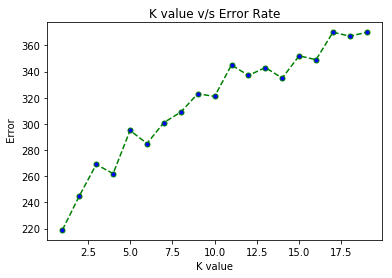

In [29]:
plt.plot(k_list,mis_class, color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.title('K value v/s Error Rate')
plt.xlabel('K value')
plt.ylabel(' Error')

confusion matrix :
[[3240  165]
 [  45 1050]]
Accuracy : 
0.9533333333333334
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3405
           1       0.86      0.96      0.91      1095

    accuracy                           0.95      4500
   macro avg       0.93      0.96      0.94      4500
weighted avg       0.96      0.95      0.95      4500



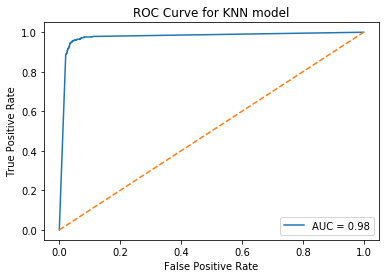

In [30]:
# Creating and Fitting Model
knn= KNeighborsClassifier(n_neighbors =4,weights='distance')
knn.fit(x_train,y_train)

# Predicting and Checking
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test,knn_pred)
knn_accuracy = accuracy_score(y_test,knn_pred)
print("confusion matrix :" ,knn_conf,sep="\n")
print("Accuracy : ",knn_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,knn_pred),sep="\n")

# ROC and AUC Curve
pred_probknn = knn.predict_proba(x_test)

auc_knn= roc_auc_score(y_test,pred_probknn[:,1])
fprkn,tprkn,thresholdskn = roc_curve(y_test,pred_probknn[:,1])
plt.plot(fprkn,tprkn,label="AUC = %.2f" %  auc_knn )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN model")
plt.plot([0,1],[0,1],"--")
plt.legend()

## Note: 
1.) Accuracy is 95.33 %

2.) MisClassification (FP + FN) : 210 records

## ii) Model 2 - Logistic Regression 

In [31]:
# Importing Library
from sklearn.linear_model import LogisticRegression

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix :
[[3149  256]
 [ 819  276]]
Accuracy : 
0.7611111111111111
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3405
           1       0.52      0.25      0.34      1095

    accuracy                           0.76      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.73      0.76      0.73      4500

Area under the curve is 0.8047094321404865


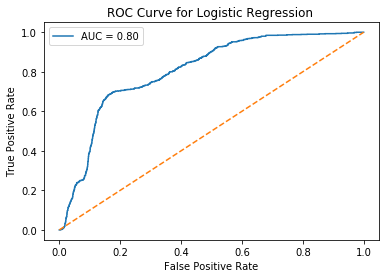

In [32]:
# Creating & Fitting Model
log=LogisticRegression()
log.fit(x_train,y_train)

# Predicting & Checking 
log_pred = log.predict(x_test)
log_conf = confusion_matrix(y_test,log_pred)
log_accuracy = accuracy_score(y_test,log_pred)
print("Confusion matrix :" ,log_conf,sep="\n")
print("Accuracy : ",log_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,log_pred),sep="\n")

# ROC & AUC Curve
pred_prob_log = log.predict_proba(x_test)

fpr,tpr,thresholds = roc_curve(y_test,pred_prob_log[:,1])
logit_roc_auc = roc_auc_score(y_test,pred_prob_log[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label = "AUC = %.2f" % logit_roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression ")
plt.plot([0,1],[0,1],"--")
plt.legend()

print("Area under the curve is {}".format(logit_roc_auc))

## Note: 
1.) Accuracy is 76.11 %

2.) MisClassification (FP + FN) : 1075 

## iii.) Model 3 - Naive Bayes

In [33]:
# Importing Libraries
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

confusion matrix :
[[2818  587]
 [ 310  785]]
Accuracy : 
0.8006666666666666
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      3405
           1       0.57      0.72      0.64      1095

    accuracy                           0.80      4500
   macro avg       0.74      0.77      0.75      4500
weighted avg       0.82      0.80      0.81      4500



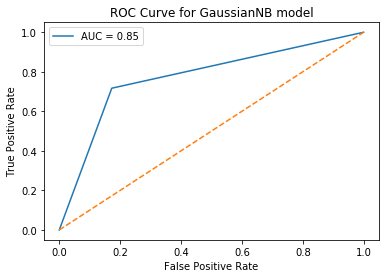

In [34]:
# Gaussian NB
# performing model fitting log transformed
gnb= GaussianNB()
gnb.fit(x_train,y_train)
gnb_predl = gnb.predict(x_test)
gnb_confl = confusion_matrix(y_test,gnb_predl)
gnb_accuracyl= accuracy_score(y_test,gnb_predl)
print("confusion matrix :" ,gnb_confl,sep="\n")
print("Accuracy : ",gnb_accuracyl,sep="\n")
print("Classification Report : ",classification_report(y_test,gnb_predl),sep="\n")

pred_probgnb = gnb.predict_proba(x_test)
auc_gnb = roc_auc_score(y_test,pred_probgnb[:,1])
fprgnb,tprgnb,thresholdsgnb = roc_curve(y_test,gnb_predl)
plt.plot(fprgnb,tprgnb,label="AUC = %.2f" %  auc_gnb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for GaussianNB model")
plt.plot([0,1],[0,1],"--")
plt.legend()

## Note: 
1.) Accuracy is 80.07 %

2.) MisClassification (FP + FN) : 897

## iv.) Model 4 - Decision Tree 

In [35]:
# Importing Library
from sklearn.tree import DecisionTreeClassifier

confusion matrix :
[[3338   67]
 [  91 1004]]
Accuracy : 
0.9648888888888889
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3405
           1       0.94      0.92      0.93      1095

    accuracy                           0.96      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



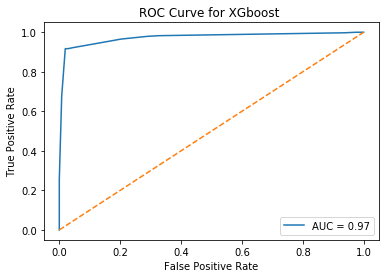

In [36]:
# Creating and Fitting Model
DT= DecisionTreeClassifier(criterion="entropy",max_depth=4)
DT.fit(x_train,y_train)

# Predicting and Checking
DT_pred = DT.predict(x_test)
DT_conf = confusion_matrix(y_test,DT_pred)
DT_accuracy = accuracy_score(y_test,DT_pred)
print("confusion matrix :" ,DT_conf,sep="\n")
print("Accuracy : ",DT_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,DT_pred),sep="\n")

# ROC and AUC Curve
pred_prob_DT = DT.predict_proba(x_test)
auc_DT = roc_auc_score(y_test,pred_prob_DT[:,1])
fprDT,tprDT,thresholdsDT = roc_curve(y_test,pred_prob_DT[:,1])
plt.plot(fprDT,tprDT,label = "AUC = %.2f" % auc_DT)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

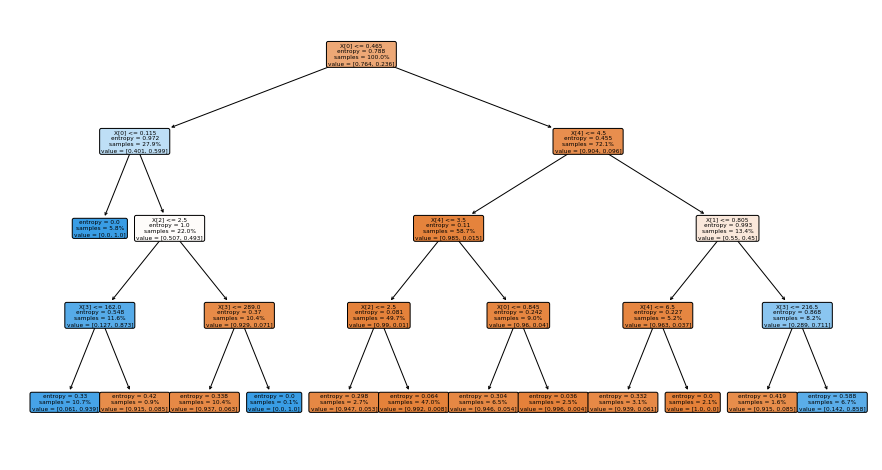

In [37]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(DT.fit(x_train,y_train), filled=True, precision=3, proportion=True, rounded=True)
plt.show()

## Note: 
1.) Accuracy is 96.62 %

2.) MisClassification (FP + FN) : 158  

## v.) Model 5 - Random Forest 

In [38]:
# Importing Library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


confusion matrix :
[[3399    6]
 [  39 1056]]
Accuracy : 
0.99
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3405
           1       0.99      0.96      0.98      1095

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



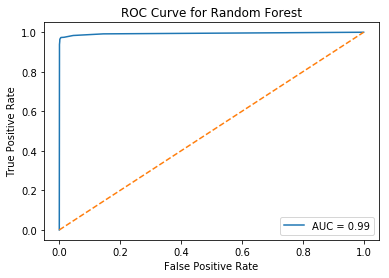

In [39]:
# Creating and Fitting Model
rf= RandomForestClassifier(criterion="entropy",max_depth=32)
rf.fit(x_train,y_train)

# Predicting and Checking
rf_pred = rf.predict(x_test)
rf_conf = confusion_matrix(y_test,rf_pred)
rf_accuracy = accuracy_score(y_test,rf_pred)
print("confusion matrix :" ,rf_conf,sep="\n")
print("Accuracy : ",rf_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,rf_pred),sep="\n")

# ROC & AUC Curve
pred_prob_rf = rf.predict_proba(x_test)
auc_rf = roc_auc_score(y_test,pred_prob_rf[:,1])
fprrf,tprrf,thresholdsrf = roc_curve(y_test,pred_prob_rf[:,1])

plt.plot(fprrf,tprrf,label = "AUC = %.2f" % auc_rf)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.plot([0,1],[0,1],"--")
plt.legend()

## Note: 
1.) Accuracy is 99.06 %

2.) MisClassification (FP + FN) : 42    

## vi.) Model 6 - AdaBoost 

In [40]:
# Importing Library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

confusion matrix : 
[[3348   57]
 [  38 1057]]
Accuracy : 
0.9788888888888889
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3405
           1       0.95      0.97      0.96      1095

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



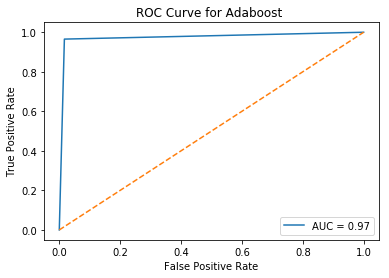

In [41]:
# Creating & Fitting Model
ab= AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=10,learning_rate=1.0,random_state=0)
ab.fit(x_train,y_train)

# Predicting and Checking
ab_pred = ab.predict(x_test)
ab_conf = confusion_matrix(y_test,ab_pred)
ab_accuracy= accuracy_score(y_test,ab_pred)
print("confusion matrix : " ,ab_conf,sep="\n")
print("Accuracy : ",ab_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,ab_pred),sep="\n")

# ROC & AUC Curve
pred_probab = ab.predict_proba(x_test)
auc_ab = roc_auc_score(y_test,pred_probab[:,1])
fprab,tprab,thresholdsab = roc_curve(y_test,pred_probab[:,1])

plt.plot(fprab,tprab,label = "AUC = %.2f" % auc_ab)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Adaboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

## Note: 
1.) Accuracy is 97.88 %

2.) MisClassification (FP + FN) : 95

## vii.) Model 7 - Gradient Boost 

In [42]:
# Importing Library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

confusion matrix :
[[3369   36]
 [  72 1023]]
Accuracy : 
0.976
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3405
           1       0.97      0.93      0.95      1095

    accuracy                           0.98      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500



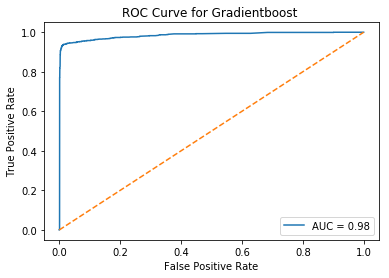

In [43]:
# Creating and Fitting Model
gb= GradientBoostingClassifier(n_estimators=10,learning_rate=0.9)
gb.fit(x_train,y_train)

# Predicting and Checking
gb_pred = gb.predict(x_test)
gb_conf = confusion_matrix(y_test,gb_pred)
gb_accuracy = accuracy_score(y_test,gb_pred)
print("confusion matrix :" ,gb_conf,sep="\n")
print("Accuracy : ",gb_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,gb_pred),sep="\n")

# ROC and AUC Curve
pred_probgb = gb.predict_proba(x_test)
auc_gb = roc_auc_score(y_test,pred_probgb[:,1])
fprgb,tprgb,thresholdsgb = roc_curve(y_test,pred_probgb[:,1])

plt.plot(fprgb,tprgb,label = "AUC = %.2f" % auc_gb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradientboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

## Note: 
1.) Accuracy is 97.6 %

2.) MisClassification (FP + FN) : 108   

## viii.) Model 8 - XG Boost 

In [44]:
# Importing Library
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

confusion matrix :
[[3371   34]
 [  32 1063]]
Accuracy : 
0.9853333333333333
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3405
           1       0.97      0.97      0.97      1095

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



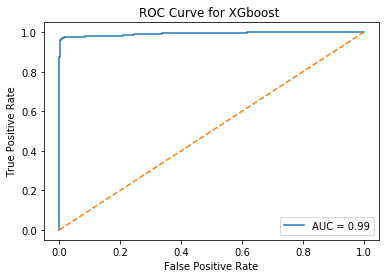

In [45]:
# Creating and Fitting Model
xgb= XGBClassifier(n_estimators=800,learning_rate=0.8)
xgb.fit(x_train,y_train)

# Predicting and Checking
xgb_pred = xgb.predict(x_test)
xgb_conf = confusion_matrix(y_test,xgb_pred)
xgb_accuracy = accuracy_score(y_test,xgb_pred)
print("confusion matrix :" ,xgb_conf,sep="\n")
print("Accuracy : ",xgb_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,xgb_pred),sep="\n")

# ROC & AUC Curve
pred_prob_xgb = xgb.predict_proba(x_test)
auc_xgb = roc_auc_score(y_test,pred_prob_xgb[:,1])
fprxgb,tprxgb,thresholdsxgb = roc_curve(y_test,pred_prob_xgb[:,1])

plt.plot(fprxgb,tprxgb,label = "AUC = %.2f" % auc_xgb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

### Note:
1.) Accuracy is 98.53 %

2.) MisClassification (FP + FN) : 66 


### Which model gives best accuracy and why?

- Random Forset gives best accuracy.

- Random forrest is an ensembling technique taht aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield best results.

### Do you feel accuracy is a good performance evaluation metric for the given data? If yes, justify your answer. If no, justify your answer and suggest alternative metric/s.¶ 

- Accuracy is not the best evaluation metric for the given data because accuracy can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.
- Confusion matrix(mis-classification) and Area Under the curve gives better idea of in this dats set .

# ************
